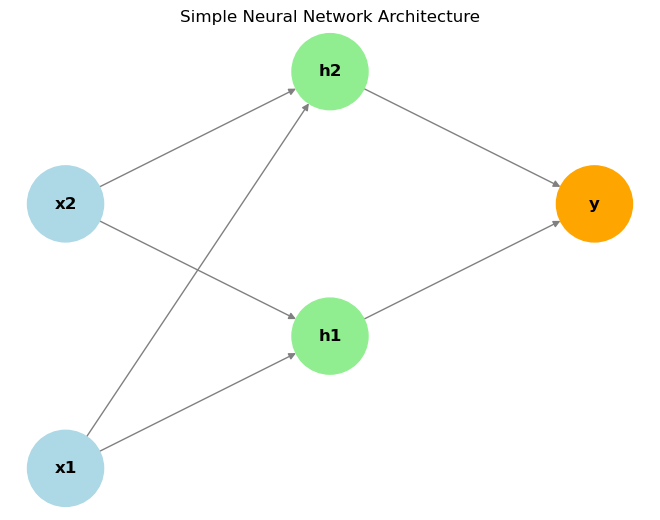

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_simple_nn():
    
    # Create a directed graph
    G = nx.DiGraph()

    # Nodes: Input Layer (x1, x2), Hidden Layer (h1, h2), Output Layer (y)
    input_nodes = ['x1', 'x2']
    hidden_nodes = ['h1', 'h2']
    output_node = ['y']

    # Add nodes to the graph with their layers
    G.add_nodes_from(input_nodes, layer='input')
    G.add_nodes_from(hidden_nodes, layer='hidden')
    G.add_nodes_from(output_node, layer='output')

    # Add edges (connections between nodes)
    for node_in in input_nodes:
        for node_hidden in hidden_nodes:
            G.add_edge(node_in, node_hidden)

    for node_hidden in hidden_nodes:
        G.add_edge(node_hidden, output_node[0])

    # Set node colors by layer
    node_colors = ['lightblue' if G.nodes[node]['layer'] == 'input' else 
                   'lightgreen' if G.nodes[node]['layer'] == 'hidden' else 
                   'orange' for node in G.nodes]

    # Define positions of nodes for a clear layout
    pos = {'x1': (0, 0), 'x2': (0, 1), 'h1': (1, 0.5), 'h2': (1, 1.5), 'y': (2, 1)}
    
    # Draw the graph with the specified positions
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')
    
    # Set the title of the plot
    plt.title("Simple Neural Network Architecture")
    plt.show()

# Call the function to plot the neural network
plot_simple_nn()


tensorflow code, from the website

In [9]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9)
model.evaluate(x_test, y_test)

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8557 - loss: 0.4849
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9552 - loss: 0.1510
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9649 - loss: 0.1107
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9718 - loss: 0.0928
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9753 - loss: 0.0783
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9801 - loss: 0.0643
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9820 - loss: 0.0570
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0501
Epoch 9/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9851 - loss: 0.0457
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9744 - loss: 0.0833


[0.0698218047618866, 0.9786999821662903]

how tensorflow and keras come together



In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5106 - loss: 0.7104 - val_accuracy: 0.4375 - val_loss: 0.7223
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 0.6492 - val_accuracy: 0.6000 - val_loss: 0.6789
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6135 - val_accuracy: 0.6438 - val_loss: 0.6401
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5946 - val_accuracy: 0.7063 - val_loss: 0.6032
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.5569 - val_accuracy: 0.7312 - val_loss: 0.5681


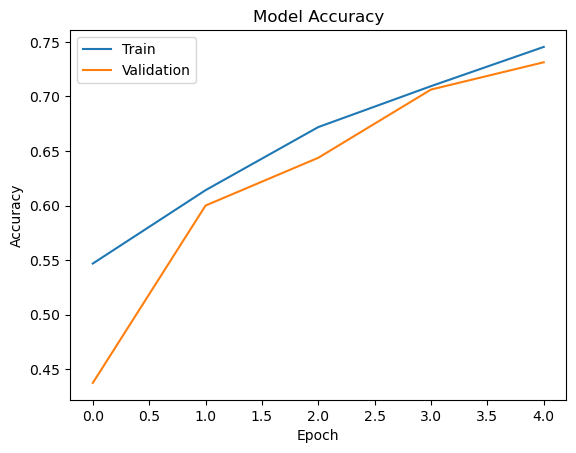

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




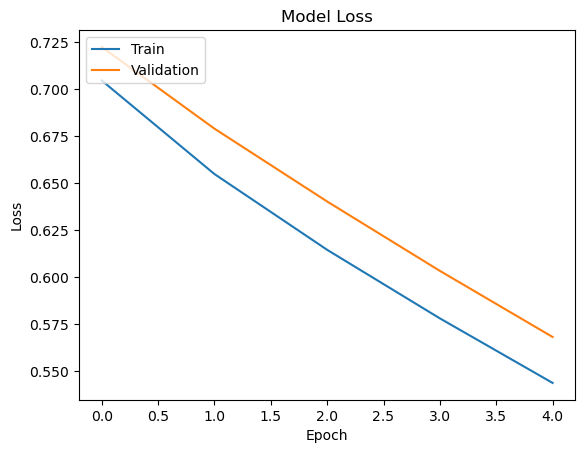

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(X, y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7577 - loss: 0.5321
Test Loss: 0.5413326025009155
Test Accuracy: 0.7459999918937683


In [17]:
# Save the trained model to a file
model.save("tfinclass.h5")

In [18]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("tfinclass.h5")

### **IMPLEMENTATION of RNN**

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import Adam

In [20]:
# Sample text (you can use larger datasets for actual text generation)

text = "hello world, welcome to the world of machine learning"

In [21]:
# Preprocessing the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]

In [25]:
sequences

[2, 1, 3, 4, 5, 1, 6, 7, 8]

In [22]:
# Preparing data for training (using previous words to predict the next one)
X, y = [], []

seq_length = 3

for i in range(len(sequences) - seq_length):
    
    X.append(sequences[i:i+seq_length])
    
    y.append(sequences[i+seq_length])

In [23]:
X

[[2, 1, 3], [1, 3, 4], [3, 4, 5], [4, 5, 1], [5, 1, 6], [1, 6, 7]]

In [24]:
y

[4, 5, 1, 6, 7, 8]

In [26]:
# Convert to numpy arrays
import numpy as np

X, y = np.array(X), np.array(y)

In [28]:
# Build the RNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10, input_length=seq_length),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

c:\Users\devid\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
# Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.1926
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1667 - loss: 2.1784
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3333 - loss: 2.1641
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3333 - loss: 2.1496
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6667 - loss: 2.1348
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6667 - loss: 2.1197
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6667 - loss: 2.1042
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6667 - loss: 2.0882
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 2.0716
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8333 - loss: 2.0544
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8333 - loss: 2.0365
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8333 - 

In [30]:
np.array([X[-1]])

array([[1, 6, 7]])

In [31]:
# Example: Predict the next word given a sequence
prediction = model.predict(np.array([X[-1]]))
print(f"Predicted next word: {tokenizer.index_word[np.argmax(prediction)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted next word: learning


### **CNN**

we will use the cIFAR 10 dataset

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [33]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [37]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

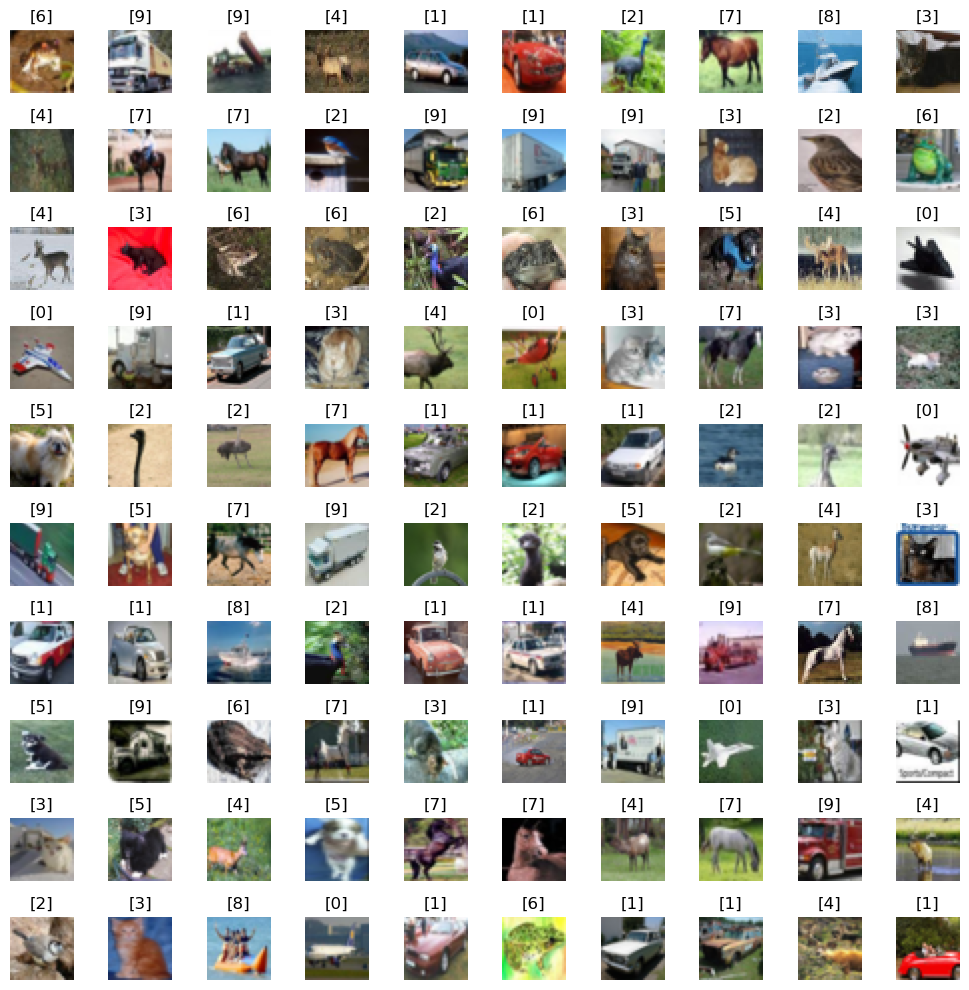

In [38]:
# Display the first 100 images from the test set
plt.figure(figsize=(10, 10))

for i in range(100):

    plt.subplot(10, 10, i + 1)  # Arrange in a 10x10 grid
    
    plt.imshow(x_train[i])
    plt.title([y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Let's add class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#                0              1           2      3       4        5       6       7       8        9

In [40]:
class_names[2]

'Bird'

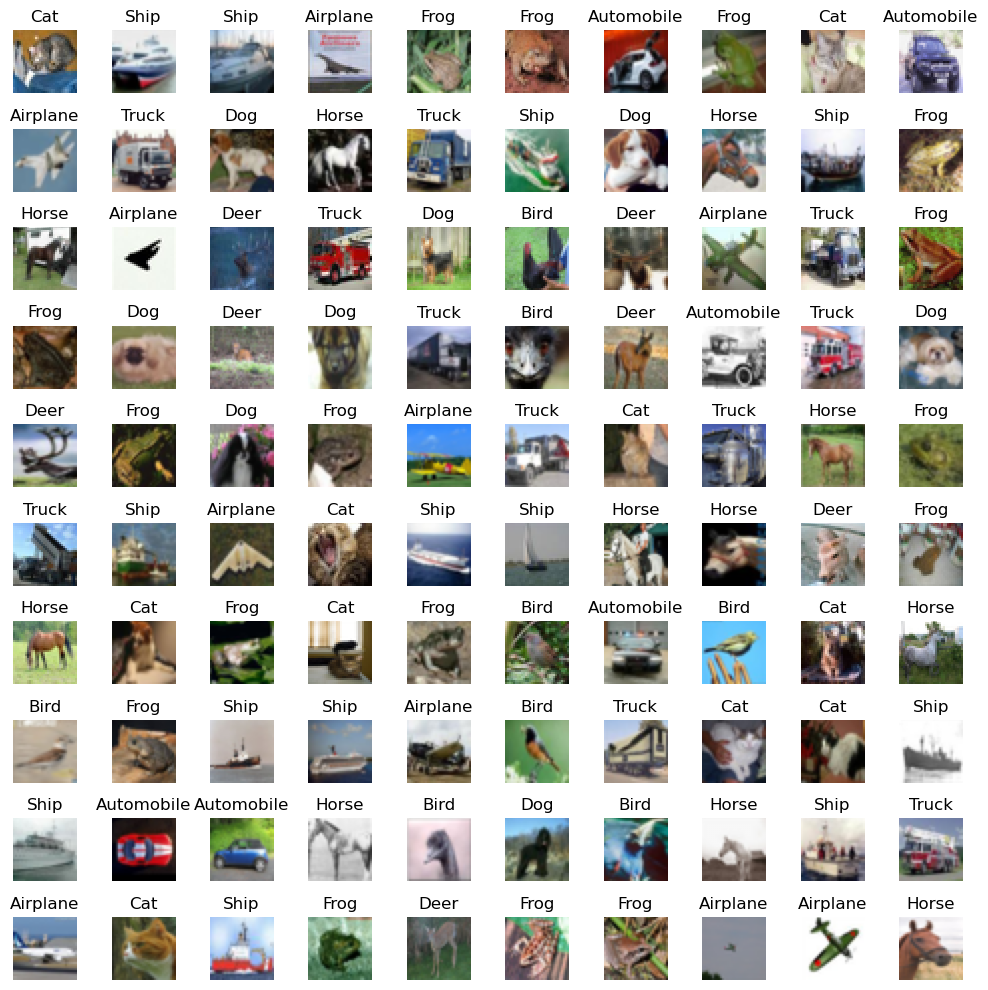

In [54]:
# Display the first 100 images from the test set
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)  # Arrange in a 10x10 grid
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x_train[[1]].shape # 32 columns, 32 rows, 3 layers (RGB)

(1, 32, 32, 3)

In [46]:
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\devid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:

# Compile and train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1) # 10 epochs recommended



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3563 - loss: 1.7442


In [48]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5451 - loss: 1.2717
Test accuracy: 0.5418000221252441


In [52]:
# Make a prediction on a test sample (let's take the first image from the test set)
sample_image = x_test[8:10] 

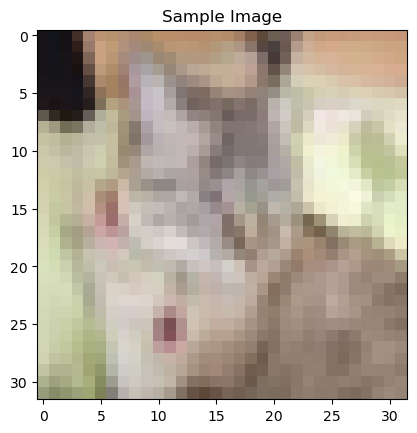

In [53]:
# Plot the sample image
plt.imshow(sample_image[0])  # Show the image (index 0 because the sample is a batch of 1)
plt.title(f"Sample Image")  # Display the true label (class) of the sample
plt.show()

In [55]:
# Predict the class for the sample
prediction = model.predict(sample_image)

# Get the predicted class (class with the highest probability)
predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

# Get the class name corresponding to the predicted class
predicted_class_name = class_names[predicted_class]

# Print the predicted class and class name
print(f"Predicted class label: {predicted_class}")
print(f"Predicted class name: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class label: 3
Predicted class name: Cat
